<a href="https://colab.research.google.com/github/affanbinusman/Perception-Robotics/blob/main/ResNet_Eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

**Initializations**

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os 
from torchvision import models
from torchvision import transforms
import torch

In [ ]:
data = []
local_download_path = "/content/images"
for filename in os.listdir(local_download_path):
    if filename.endswith("JPG"): 
        # print(filename)
        data.append(filename)

In [ ]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

--2023-02-10 17:51:25--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.2’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2023-02-10 17:51:25 (105 MB/s) - ‘imagenet_classes.txt.2’ saved [10472/10472]



**Functions**

In [ ]:
# Function to display 20 images
rows, columns = 6, 5
images_raw = []

def disp20imgs():
  global images_raw
  images_raw = []
  fig = plt.figure(figsize=(18, 15))
  for v, i in enumerate(data):
    imgtemp = Image.open ('/content/images/%s' % i).convert ('RGB')
    images_raw.append(imgtemp)

    fig.add_subplot(rows, columns, v+1)
    plt.axis('off')
    plt.title( str(v+1) + ("/20 Img Size %s" % str(imgtemp.size) ))
    plt.imshow(imgtemp)

In [ ]:
#Function to transformed images
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
          mean=[0.485, 0.456, 0.406],
          std=[0.229, 0.224, 0.225])
    ])

processed_imageS = []

def disptransimgs():
  global processed_imageS
  processed_imageS = []
  fig = plt.figure(figsize=(18, 15))

  for i, val in enumerate(images_raw):
    processed_image = preprocess(val)
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title( str(i+1) + "/20 " + str(processed_image.shape) )
    plt.imshow(processed_image.permute(1, 2, 0))
    processed_imageS.append(processed_image)

In [ ]:
# Function for Prediction index, class, and confidence score
def modelevalres(model):

  batch_images = torch.stack(processed_imageS)
  model.eval()
  out = model(batch_images)
  _, b = torch.max(out,1)
  b += 1
  _, index = torch.max(out, 1)
  print("Shape of prediction:", out.shape)
  print()
  las = []

  for i in range(len(index)):
    percentage = torch.nn.functional.softmax(out, dim=1)[i] * 100
    # print(("Image %i/10: " %(i+1)) + labels[index[i]], percentage[index[i]].item())
    print(("Image %i/20" %(i+1)))
    print("Prediction indexes:", b[i])
    print("Class: " + labels[index[i]] + " (Confidence Score: " + str(percentage[index[i]].item()) + ")\n")
    las.append( [ labels[index[i]] , percentage[index[i]].item() ] )
  
  return las

In [ ]:
# Function for display accuracies
def dispacc(x, partnum):
  print("For Part %s" % partnum)
  print("Accuracy = Number of correct predictions / Total number of predictions")
  print((x/20)*100, "%")

**Part A**

Displaying 20 Images


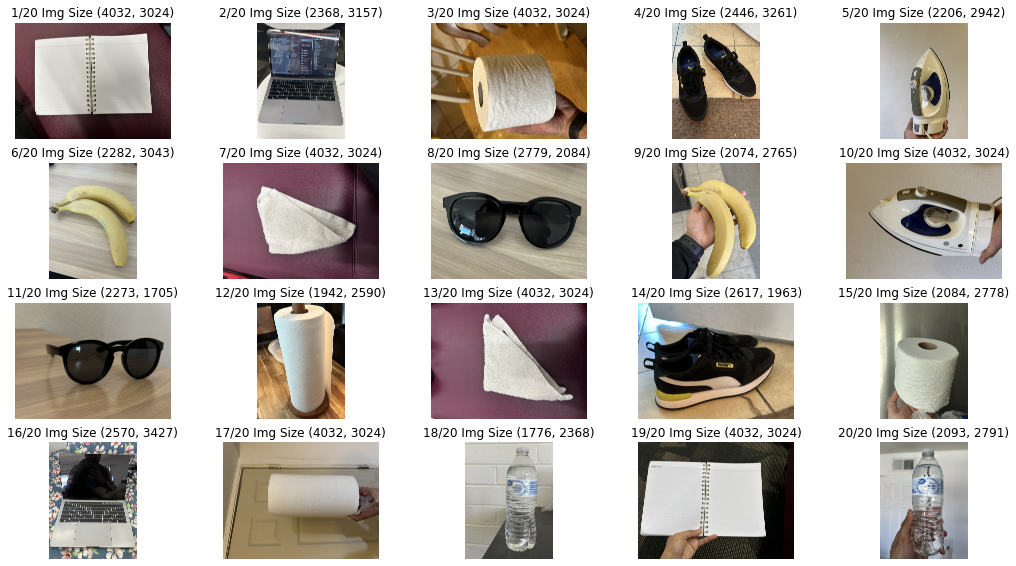

In [ ]:
model_parta = models.resnet50 (pretrained = True) # declare your model here

# Function call to display 20 images
print("Displaying 20 Images")
disp20imgs()

Displaying 20 Transformed Images


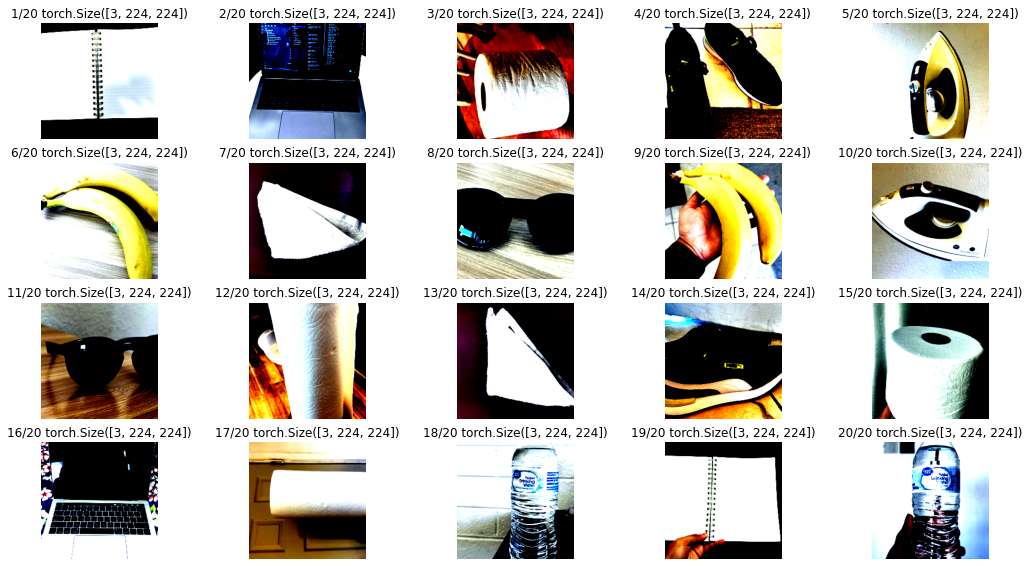

In [ ]:
#Function call to display transformed images
print("Displaying 20 Transformed Images")
disptransimgs()

In [ ]:
# Function call for Prediction index, class, and confidence score
parta_res = modelevalres(model_parta)

Shape of prediction: torch.Size([20, 1000])

Image 1/20
Prediction indexes: tensor(447)
Class: binder (Confidence Score: 89.33648681640625)

Image 2/20
Prediction indexes: tensor(682)
Class: notebook (Confidence Score: 61.46355438232422)

Image 3/20
Prediction indexes: tensor(1000)
Class: toilet tissue (Confidence Score: 68.06571960449219)

Image 4/20
Prediction indexes: tensor(771)
Class: running shoe (Confidence Score: 88.91921997070312)

Image 5/20
Prediction indexes: tensor(607)
Class: iron (Confidence Score: 99.98077392578125)

Image 6/20
Prediction indexes: tensor(955)
Class: banana (Confidence Score: 99.21906280517578)

Image 7/20
Prediction indexes: tensor(435)
Class: bath towel (Confidence Score: 99.1003646850586)

Image 8/20
Prediction indexes: tensor(838)
Class: sunglasses (Confidence Score: 56.7361946105957)

Image 9/20
Prediction indexes: tensor(955)
Class: banana (Confidence Score: 96.1135482788086)

Image 10/20
Prediction indexes: tensor(607)
Class: iron (Confidence Scor

In [ ]:
# Function call for display accuracies
dispacc(18, "A")  

For Part A
Accuracy = Number of correct predictions / Total number of predictions
90.0 %


**Part B**

In [ ]:
model_partb = models.resnet152 (pretrained = True) # declare your model here

# code to display 20 images, transformed images, their prediction index, class, and confidence score
partb_res = modelevalres(model_partb)

Shape of prediction: torch.Size([20, 1000])

Image 1/20
Prediction indexes: tensor(447)
Class: binder (Confidence Score: 99.52326202392578)

Image 2/20
Prediction indexes: tensor(682)
Class: notebook (Confidence Score: 69.69071960449219)

Image 3/20
Prediction indexes: tensor(1000)
Class: toilet tissue (Confidence Score: 86.53265380859375)

Image 4/20
Prediction indexes: tensor(771)
Class: running shoe (Confidence Score: 62.248558044433594)

Image 5/20
Prediction indexes: tensor(607)
Class: iron (Confidence Score: 99.9914779663086)

Image 6/20
Prediction indexes: tensor(955)
Class: banana (Confidence Score: 99.99457550048828)

Image 7/20
Prediction indexes: tensor(435)
Class: bath towel (Confidence Score: 94.501220703125)

Image 8/20
Prediction indexes: tensor(838)
Class: sunglasses (Confidence Score: 56.09931182861328)

Image 9/20
Prediction indexes: tensor(955)
Class: banana (Confidence Score: 98.93736267089844)

Image 10/20
Prediction indexes: tensor(607)
Class: iron (Confidence Sco

In [ ]:
# Function call for display accuracies
dispacc(18, "B")  

For Part B
Accuracy = Number of correct predictions / Total number of predictions
90.0 %


**Part C**

In [ ]:
model_partc = models.shufflenet_v2_x0_5 (pretrained = True) # declare your model here
# (pretrained = True)
# code to display 20 images, transformed images, their prediction index, class, and confidence score
partc_res = modelevalres(model_partc)

Shape of prediction: torch.Size([20, 1000])

Image 1/20
Prediction indexes: tensor(447)
Class: binder (Confidence Score: 47.456390380859375)

Image 2/20
Prediction indexes: tensor(621)
Class: laptop (Confidence Score: 35.10213851928711)

Image 3/20
Prediction indexes: tensor(1000)
Class: toilet tissue (Confidence Score: 54.607425689697266)

Image 4/20
Prediction indexes: tensor(771)
Class: running shoe (Confidence Score: 73.690185546875)

Image 5/20
Prediction indexes: tensor(607)
Class: iron (Confidence Score: 95.39346313476562)

Image 6/20
Prediction indexes: tensor(955)
Class: banana (Confidence Score: 93.57256317138672)

Image 7/20
Prediction indexes: tensor(435)
Class: bath towel (Confidence Score: 98.79670715332031)

Image 8/20
Prediction indexes: tensor(838)
Class: sunglasses (Confidence Score: 61.23224639892578)

Image 9/20
Prediction indexes: tensor(955)
Class: banana (Confidence Score: 85.87580108642578)

Image 10/20
Prediction indexes: tensor(607)
Class: iron (Confidence Sco

In [ ]:
# Function call for display accuracies
dispacc(20, "C")  

For Part C
Accuracy = Number of correct predictions / Total number of predictions
100.0 %


**Comparisons Between Results**

In [ ]:
# Display comparison between results from parta, partb and partc.
for i in range(len(data)):
  print("Image %i/20:" % (i+1) )
  print("Part A:", parta_res[i][0], "with", parta_res[i][1], "% confidence" )
  print("Part B:", partb_res[i][0], "with", partb_res[i][1], "% confidence" )
  print("Part C:", partc_res[i][0], "with", partc_res[i][1], "% confidence" )
  print()

Image 1/20:
Part A: binder with 89.33648681640625 % confidence
Part B: binder with 99.52326202392578 % confidence
Part C: binder with 47.456390380859375 % confidence

Image 2/20:
Part A: notebook with 61.46355438232422 % confidence
Part B: notebook with 69.69071960449219 % confidence
Part C: laptop with 35.10213851928711 % confidence

Image 3/20:
Part A: toilet tissue with 68.06571960449219 % confidence
Part B: toilet tissue with 86.53265380859375 % confidence
Part C: toilet tissue with 54.607425689697266 % confidence

Image 4/20:
Part A: running shoe with 88.91921997070312 % confidence
Part B: running shoe with 62.248558044433594 % confidence
Part C: running shoe with 73.690185546875 % confidence

Image 5/20:
Part A: iron with 99.98077392578125 % confidence
Part B: iron with 99.9914779663086 % confidence
Part C: iron with 95.39346313476562 % confidence

Image 6/20:
Part A: banana with 99.21906280517578 % confidence
Part B: banana with 99.99457550048828 % confidence
Part C: banana with